### AM205 HW5
#### Name: Weihang Zhang

**Problem 1.**

In [1]:
import numpy as np
from scipy.optimize import minimize, line_search, fsolve
from scipy.integrate import quadrature
import matplotlib.pyplot as plt
import numpy.linalg as la
import seaborn as sns
import scipy.linalg as sla

(a). Steepest descent starting from (-1, 1) took 2 iterations, starting from (0, 0) took 1571 iterations and starting from (1, 1) did not converge to solution in 2000 iterations. The contour plots are shown below.

(1000, 1000)


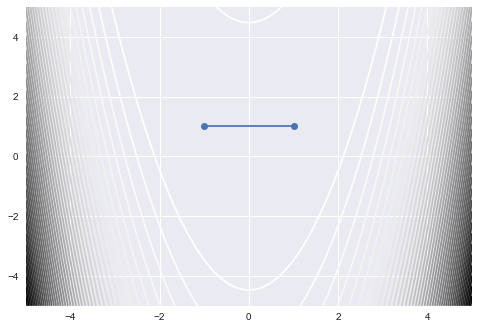

(array([ 1.,  1.]), 2)
(1000, 1000)


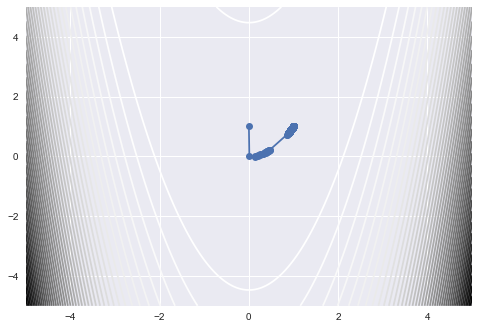

(array([ 0.99999956,  0.99999914]), 1571)
(1000, 1000)
Maximum iteration achieved!


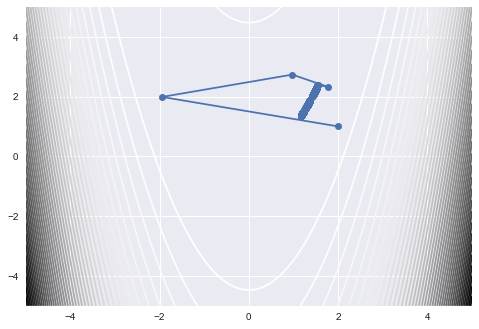

(array([ 1.16589524,  1.35976297]), 2001)


In [2]:
def f(x0):
    x = x0[0]
    y = x0[1]
    return 100 * (y-x**2)**2 + (1-x)**2

def gradient(x0):
    x = x0[0]
    y = x0[1]
    ret = np.zeros(2)
    ret[0] = 2*(200*x**3 - 200*x*y + x -1)
    ret[1] = 200*(y-x**2)
    return ret

def hessian(x0):
    x = x0[0]
    y = x0[1]
    ret = np.zeros((2,2))
    ret[0][0] = 1200*x**2 - 400*y + 2
    ret[0][1] = -400*x
    ret[1][0] = -400*x
    ret[1][1] = 200
    return ret

def steepest_decent(x0):
    plt.figure()
    xs = np.linspace(-5, 5, 1000)
    ys = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(xs, ys)
    print(X.shape)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 50)

    count = 0
    x = x0
    plot_points = [x]
    while True:
        if count > 2000:
            print('Maximum iteration achieved!')
            break
        s = -gradient(x)
        ret = line_search(f, gradient, x, s)
        x_new = x + ret[0]*s
        count += 1
        if la.norm(ret[0]*s) < 1e-8:
            break
        x = x_new
        plot_points.append(x)
    plot_points = np.array(plot_points)
    plt.plot(plot_points[:, 0], plot_points[:, 1], '-o')
    plt.show()
    return x, count

x_01 = np.array([-1, 1])
x_02 = np.array([0, 1])
x_03 = np.array([2, 1])

print(steepest_decent(x_01))
print(steepest_decent(x_02))
print(steepest_decent(x_03))

(b). Newton's method starting from (-1, 1) took 3 iterations, starting from (0, 0) took 6 iterations and starting from (1, 1) took 6 iterations as well. The contour plots are shown below.

(1000, 1000)


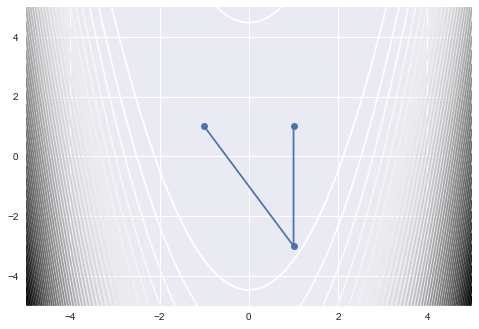

(array([ 1.,  1.]), 3)
(1000, 1000)


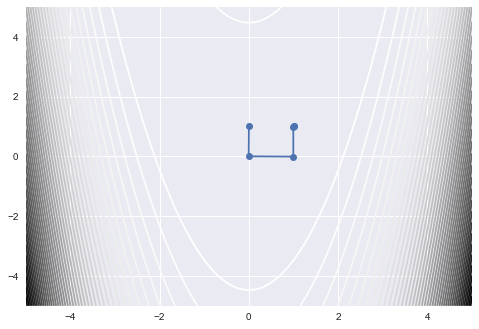

(array([ 1.,  1.]), 6)
(1000, 1000)


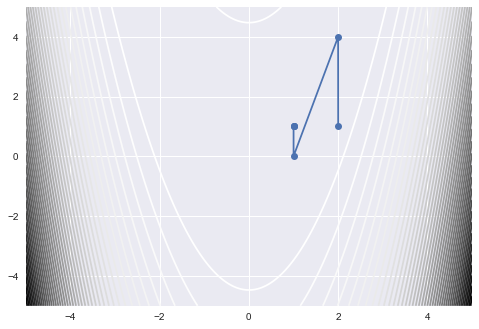

(array([ 1.,  1.]), 6)


In [3]:
def newton(x0):
    plt.figure()
    xs = np.linspace(-5, 5, 1000)
    ys = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(xs, ys)
    print(X.shape)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 50)
    
    count = 0
    x = x0
    plot_points = [x]
    while True:
        if count > 2000:
            print('Maximum iteration achived!')
            break
        s = la.solve(hessian(x), -gradient(x))
        x_new = x + s
        count += 1
        if la.norm(s) < 1e-8:
            break
        x = x_new
        plot_points.append(x)
    
    plot_points = np.array(plot_points)
    plt.plot(plot_points[:, 0], plot_points[:, 1], '-o')
    plt.show()
    return x, count

print(newton(x_01))
print(newton(x_02))
print(newton(x_03))

(c). BFGS starting from (-1, 1) took 124 iterations, starting from (0, 0) took 38 iterations and starting from (1, 1) took 45 iterations. The contour plots are shown below.

(1000, 1000)


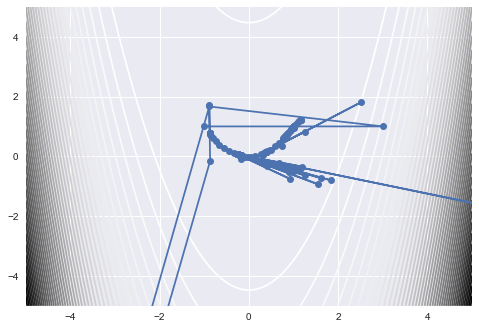

(array([[ 1.],
       [ 1.]]), 124)
(1000, 1000)


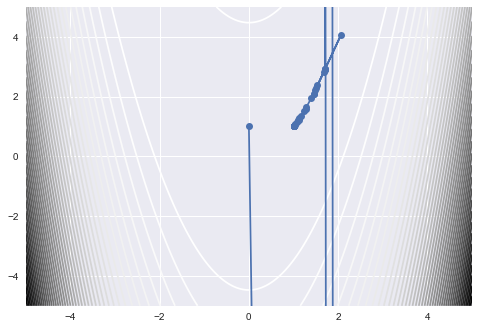

(array([[ 1.],
       [ 1.]]), 38)
(1000, 1000)


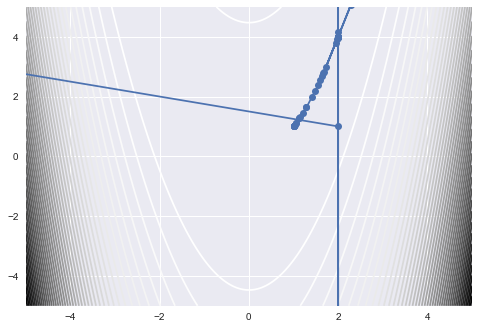

(array([[ 1.],
       [ 1.]]), 45)


In [4]:
def BFGS(x0):
    plt.figure()
    xs = np.linspace(-5, 5, 1000)
    ys = np.linspace(-5, 5, 1000)
    X, Y = np.meshgrid(xs, ys)
    print(X.shape)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 50)
    
    H = np.eye(2)
    x = x0.reshape(-1, 1)
    count = 0
    plot_points = [x]
    while True:
        s = -H@gradient(x)
        s = s.reshape(-1, 1)
        x_new = x + s
        count += 1
        if la.norm(s) < 1e-8:
            break
        y = gradient(x_new) - gradient(x)
        y = y.reshape(-1, 1)
        p = 1/(y.T@s)
        I = np.eye(2)
        H = (I - s*p@y.T)@H@(I - p*y@s.T) + p*s@s.T
        x = x_new
        plot_points.append(x)
    
    plot_points = np.array(plot_points)
    plt.plot(plot_points[:, 0], plot_points[:, 1], '-o')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.show()
    return x, count

print(BFGS(x_01))
print(BFGS(x_02))
print(BFGS(x_03))

**Problem 2.**

(a).

$\mathcal{L} = T + \lambda(I - R) $

$\mathcal{L} = \int_0^L \rho y^2w^2\sqrt{1 + (\frac{\partial y}{\partial x})^2}dx + \lambda(\int_0^L\sqrt{1 + (\frac{\partial y}{\partial x})^2}dx - R)$

$\frac{\partial\mathcal{L}}{\partial b_j} = \int_0^L \frac{\partial}{\partial b_j} \rho y^2w^2\sqrt{1 + (\frac{\partial y}{\partial x})^2}dx + \lambda \int_0^L \frac{\partial}{\partial b_j} \sqrt{1 + (\frac{\partial y}{\partial x})^2}dx$

$\frac{\partial\mathcal{L}}{\partial b_j} = \int_0^L \rho 2yw^2\sqrt{1 + (\frac{\partial y}{\partial x})^2} sin(\frac{\pi kx}{L})dx + \int_0^L\rho y^2w^2 \frac{\frac{\partial y}{\partial x}}{\sqrt{1 + (\frac{\partial y}{\partial x})^2}} \frac{\pi k}{L} cos(\frac{\pi kx}{L})dx + 
\lambda \int_0^L \frac{\frac{\partial y}{\partial x}}{\sqrt{1 + (\frac{\partial y}{\partial x})^2}} \frac{\pi k}{L} cos(\frac{\pi kx}{L})dx$

Therefore, $\nabla_b\mathcal{L} = (\frac{\partial\mathcal{L}}{\partial b_1}, \frac{\partial\mathcal{L}}{\partial b_2}, \dots, \frac{\partial\mathcal{L}}{\partial b_{20}})$, 

where $\frac{\partial\mathcal{L}}{\partial b_j} = \int_0^L \rho 2yw^2\sqrt{1 + (\frac{\partial y}{\partial x})^2} sin(\frac{\pi kx}{L})dx + \int_0^L\rho y^2w^2 \frac{\frac{\partial y}{\partial x}}{\sqrt{1 + (\frac{\partial y}{\partial x})^2}} \frac{\pi k}{L} cos(\frac{\pi kx}{L})dx + 
\lambda \int_0^L \frac{\frac{\partial y}{\partial x}}{\sqrt{1 + (\frac{\partial y}{\partial x})^2}} \frac{\pi k}{L} cos(\frac{\pi kx}{L})dx$

The expression for $\frac{\partial\mathcal{L}}{\partial\lambda}$:

$\frac{\partial\mathcal{L}}{\partial\lambda} = I - R$

$\frac{\partial\mathcal{L}}{\partial\lambda} = \int_0^L\sqrt{1 + (\frac{\partial y}{\partial x})^2}dx - R$

(b). Below is the code I used to solve for gradient=0, plots are shown in the next cell.

In [8]:
R = 3
w, L, p = 1, 1, 1

def trap(a, b, f):
    n = 250
    h = (b-a)*1./n
    area = (f(a) + f(b))/2.0
    for i in range(1, n):
        x = a + i*h;
        area = area + f(x)
    area = area*h
    return area

def y(x, b):
    ret = 0
    for i in range(20):
        ret += b[i] * np.sin(np.pi * (i+1) * x / L)
    return ret

def dydx(b, x):
    ret = 0
    for i in range(20):
        ret += b[i] * np.pi * (i+1) / L * np.cos(np.pi * (i+1) * x / L)
    return ret

def gradient(bb):
    b = bb[:-1]
    ret = np.zeros(21)
    ret[-1] = I(b) - R
    for i in range(20):
        def b_int_1(x):
            return 2 * y(x, b) * p * w**2 * np.sqrt(1+dydx(b, x)**2) * np.sin(np.pi * (i+1) * x / L)
        def b_int_2(x):
            return y(x, b)**2 * p * w**2 * dydx(b, x)/np.sqrt(1+dydx(b, x)**2) * np.pi*(i+1)/L * np.cos(np.pi*(i+1)*x/L)
        def b_int_3(x):
            return dydx(b, x)/np.sqrt(1+dydx(b, x)**2) * np.pi*(i+1)/L * np.cos(np.pi*(i+1)*x/L)
#         ret[i] = quadrature(b_int_1, 0, L)[0] + quadrature(b_int_2, 0, L)[0] + quadrature(b_int_3, 0, L)[0] * ret[-1]
        ret[i] = trap(0, L, b_int_1) + trap(0, L, b_int_2) + trap(0, L, b_int_3) * bb[-1]
    
#     print(ret)
    return ret

def T(b):
    def T_int(x):
        return p * y(x, b)**2 * w**2 * np.sqrt(1 + dydx(b, x)**2)
#     return quadrature(T_int, 0, L)[0]
    return trap(0, L, T_int)

def I(b):
    def I_int(x):
        return np.sqrt(1 + dydx(b, x)**2)
#     return quadrature(I_int, 0, L)[0]
    return trap(0, L, I_int)

def lagrangian(b_sol):
    b = b_sol[:-1]
    lamb = b_sol[-1]
    ret = T(b) + lamb*(I(b) - R)
    return ret

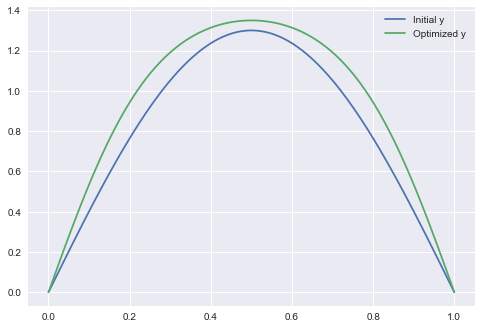

In [9]:
b0 = np.zeros(21)
b0[0] = 1.3
b_sol = fsolve(gradient, b0, xtol=1e-5)
xs = np.linspace(0, 1, 251)
y_init = y(xs, b0)
y_final = y(xs, b_sol)
plt.plot(xs, y_init, label = 'Initial y')
plt.plot(xs, y_final, label = 'Optimized y')
plt.legend()
plt.show()

(c). Changing the initial to be $b_2 = 0.7$, we got a different plot.

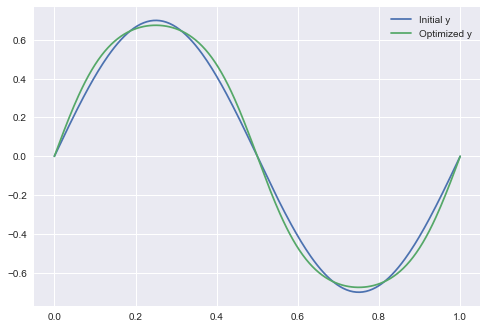

In [10]:
b0 = np.zeros(21)
b0[1] = 0.7
b_sol = fsolve(gradient, b0, xtol=1e-5)
xs = np.linspace(0, 1, 251)
y_init = y(xs, b0)
y_final = y(xs, b_sol)
plt.plot(xs, y_init, label = 'Initial y')
plt.plot(xs, y_final, label = 'Optimized y')
plt.legend()
plt.show()

**Problem 3.**

(a).

In [11]:
xs = np.linspace(-12, 12, 1921)
h = 24/1920

def v1(x):
    return abs(x)

def v2(x):
    return 12*(x/10)**4 - x**2/18 + x/8 + 13/10

def v3(x):
    return 8 * abs(abs(abs(x)-1)-1)

def set_matrix(f, xs):
    p = np.zeros((1921, 1921))
    for i in range(1921):
        p[i, i] = f(xs[i])
    return p

print(xs.shape)
pp = np.zeros((1921, 1921))

for i in range(1921):
    pp[i, i] = 2/h**2
    if i-1 > 0:
        pp[i][i-1] = -1/h**2
    if i+1 < len(pp):
        pp[i][i+1] = -1/h**2

(1921,)


The 3 plots for 3 different v functions are shown below.

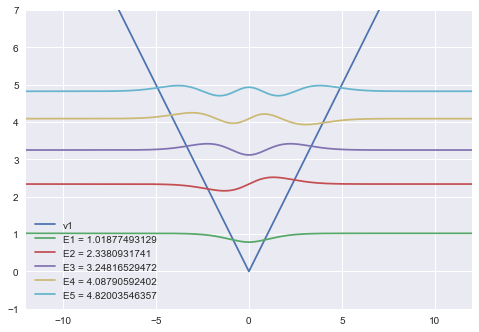

In [12]:
p = set_matrix(v1, xs)
A = pp + p
w, v = la.eig(A)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

ys = v1(xs)
plt.figure()
plt.plot(xs, ys, label = 'v1')
plt.plot(xs, 3*v[:, -1] + w[-1], label = 'E1 = ' + str(w[-1]))
plt.plot(xs, 3*v[:, -2] + w[-2], label = 'E2 = ' + str(w[-2]))
plt.plot(xs, 3*v[:, -3] + w[-3], label = 'E3 = ' + str(w[-3]))
plt.plot(xs, 3*v[:, -4] + w[-4], label = 'E4 = ' + str(w[-4]))
plt.plot(xs, 3*v[:, -5] + w[-5], label = 'E5 = ' + str(w[-5]))
plt.xlim(-12, 12)
plt.ylim(-1, 7)
plt.legend()
plt.show()

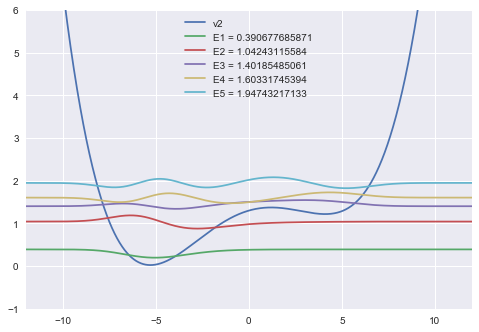

In [13]:
p = set_matrix(v2, xs)
A = pp + p
w, v = la.eig(A)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

ys = v2(xs)
plt.figure()
plt.plot(xs, ys, label = 'v2')
plt.plot(xs, 3*v[:, -1] + w[-1], label = 'E1 = ' + str(w[-1]))
plt.plot(xs, 3*v[:, -2] + w[-2], label = 'E2 = ' + str(w[-2]))
plt.plot(xs, 3*v[:, -3] + w[-3], label = 'E3 = ' + str(w[-3]))
plt.plot(xs, 3*v[:, -4] + w[-4], label = 'E4 = ' + str(w[-4]))
plt.plot(xs, 3*v[:, -5] + w[-5], label = 'E5 = ' + str(w[-5]))
plt.xlim(-12, 12)
plt.ylim(-1, 6)
plt.legend()
plt.show()

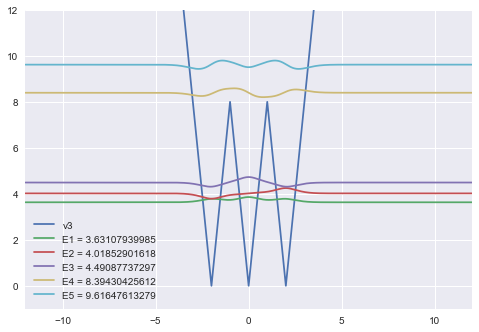

In [14]:
p = set_matrix(v3, xs)
A = pp + p
w, v = la.eig(A)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

ys = v3(xs)
plt.figure()
plt.plot(xs, ys, label = 'v3')
plt.plot(xs, 3*v[:, -1] + w[-1], label = 'E1 = ' + str(w[-1]))
plt.plot(xs, 3*v[:, -2] + w[-2], label = 'E2 = ' + str(w[-2]))
plt.plot(xs, 3*v[:, -3] + w[-3], label = 'E3 = ' + str(w[-3]))
plt.plot(xs, 3*v[:, -4] + w[-4], label = 'E4 = ' + str(w[-4]))
plt.plot(xs, 3*v[:, -5] + w[-5], label = 'E5 = ' + str(w[-5]))
plt.xlim(-12, 12)
plt.ylim(-1, 12)
plt.legend()
plt.show()

In [15]:
def trap_1(xs, ys):
    h = xs[1]-xs[0]
    area = (ys[0] + ys[-1])/2.0
    area += np.sum(ys[1:-1])
#     for i in range(1, len(xs)-1):
#         area = area + ys[i]
    area = area*h
    return area

def simpson(xs, ys):
    k = 0
    for i in range(1, len(xs)-1):
        if i % 2 == 1:
            k += 4*ys[i]
        else:
            k += 2*ys[i]
    return (h/3)*(ys[0]+ys[-1]+k)

p = set_matrix(v2, xs)
A = pp + p
w, v = la.eig(A)
idx = w.argsort()[::-1]
w = w[idx]
v = v[:,idx]

The calculated probabilities for 5 eigenmodes are reported in the pring statement below.

In [16]:
def compute_prob(xs, ys):
    xs_0 = xs[xs>=0]
    ys_0 = ys[xs>=0]
    xs_06 = xs_0[xs_0<=6]
    ys_06 = ys_0[xs_0<=6]
    return simpson(xs_06, ys_06**2) / simpson(xs, ys**2)

print('Prob for E1 is:', compute_prob(xs, v[:, -1]))
print('Prob for E2 is:', compute_prob(xs, v[:, -2]))
print('Prob for E3 is:', compute_prob(xs, v[:, -3]))
print('Prob for E4 is:', compute_prob(xs, v[:, -4]))
print('Prob for E5 is:', compute_prob(xs, v[:, -5]))

Prob for E1 is: 0.000315204189869
Prob for E2 is: 0.0303630902625
Prob for E3 is: 0.787304770369
Prob for E4 is: 0.399902299952
Prob for E5 is: 0.532512012487
